$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

## 1.1 練習問題: 

### 1.
次の量子ビットのテンソル積の(状態)ベクトルを書け。
***

$
\quad\mathbf{a)}
\quad \ket{0}\otimes \ket{1} = \left[\begin{array}{c} 1\\ 0\end{array}\right] \otimes \left[\begin{array}{c} 0\\ 1\end{array}\right] = \left[\begin{array}{c} 0\\ 1\\ 0\\ 0\end{array}\right]
$

$
\quad\mathbf{b)}
\quad \ket{0}\otimes\ket{+} = \ket{0}\otimes\frac{1}{\sqrt{2}}(\ket{0}+\ket{1}) = \left[\begin{array}{c} 1\\ 0\end{array}\right] \otimes \frac{1}{\sqrt{2}}\left[\begin{array}{c} 1\\ 1\end{array}\right]
=\frac{1}{\sqrt{2}}\left[\begin{array}{c} 1\\ 1\\ 0\\ 0\end{array}\right]
$

$
\quad\mathbf{c)}
\quad \ket{+}\otimes\ket{1} = \frac{1}{\sqrt{2}}(\ket{0}+\ket{1}) \otimes \ket{1}= \frac{1}{\sqrt{2}}\left[\begin{array}{c} 1\\ 1\end{array}\right] \otimes \left[\begin{array}{c} 0\\ 1\end{array}\right] = \frac{1}{\sqrt{2}}\left[\begin{array}{c} 0\\ 1\\ 0\\ 1\end{array}\right]
$

$
\quad\mathbf{d)}
\quad \ket{-}\otimes\ket{+} = \frac{1}{\sqrt{2}}(\ket{0}-\ket{1}) \otimes \frac{1}{\sqrt{2}}(\ket{0}+\ket{1})
=\frac{1}{\sqrt{2}}\left[\begin{array}{c} 1\\ -1\end{array}\right] \otimes \frac{1}{\sqrt{2}}\left[\begin{array}{c} 1\\ 1\end{array}\right] = \frac{1}{2}\left[\begin{array}{c} 1\\ 1\\ -1\\ -1\end{array}\right]
$

### 2.
状態を2つの別々の量子ビットとして記述せよ。 $\ket{\psi}=\frac{1}{\sqrt{2}}\ket{00}+\frac{i}{\sqrt{2}}\ket{01}$
***

$
\quad \ket{\psi} = \frac{1}{\sqrt{2}}\ket{00}+\frac{i}{\sqrt{2}}\ket{01} = \ket{0} \otimes \frac{1}{\sqrt{2}}(\ket{0}+i\ket{1})
$

※注：別々の2量子ビットの積として書けるので、$\ket{\psi}$はもつれ状態では__ない__。

================================================================================================================

## 2.1 練習問題:

### 1.
次の一連のゲートにより作成される単一量子ビットユニタリー (U) を計算せよ。$U=XZH$  
結果の確認にはQiskitのunitary simulatorを使用すること。
***

$
\quad U=XZH
$
をunitary simulatorで確認する。

In [1]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram

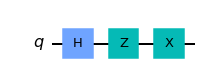

In [2]:
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.z(0)
qc1.x(0)
qc1.draw('mpl')

In [3]:
backend = Aer.get_backend('unitary_simulator')
unitary1 = execute(qc1,backend).result().get_unitary()

from qiskit.visualization import array_to_latex
array_to_latex(unitary1, prefix="U = XZH =")

<IPython.core.display.Latex object>

### 2.
上記の回路についてゲートを変更してみよ。テンソル積を計算し、unitary simulatorを用いて答え合わせをせよ。
***

例えば、テキストで例示されている $X \otimes H$ の $X$ を $Z$ に変更してみる。

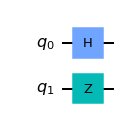

In [4]:
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.z(1)
qc2.draw('mpl')

In [5]:
backend = Aer.get_backend('unitary_simulator')
unitary2 = execute(qc2,backend).result().get_unitary()

from qiskit.visualization import array_to_latex
array_to_latex(unitary2, prefix="Z \otimes H =")

<IPython.core.display.Latex object>

この結果は正しい。（ $Z$ の非ゼロ要素に $H$ がブロックとしてそのまま掛かった構造になっていることからすぐに分かる）

================================================================================================================

## 3.4 練習問題:

### 1.
以下のベル状態を作り出す量子回路を作成せよ。 $\frac{1}{\sqrt{2}}(\ket{01}+\ket{10})$  
状態ベクトルシミュレーターを使用して結果を検証せよ。
***

以下のように、 片方のビットの入力を$\ket{1}$にしておいてから、 $H$, $CX$ を順に作用させることで作ることができる。

$
\ket{00} \xrightarrow{X(\rm{bit}1)} \ket{01} \xrightarrow {H(\rm{bit}0)} \frac{1}{\sqrt{2}}(\ket{01}+\ket{11})\xrightarrow{CX(\rm{bit}0,\rm{bit}1)} \frac{1}{\sqrt{2}}(\ket{01}+\ket{10})
$

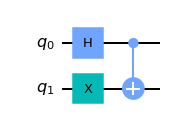

In [6]:
qc_bell = QuantumCircuit(2)
qc_bell.x(1)
qc_bell.h(0)
qc_bell.cx(0,1)
qc_bell.draw('mpl')

実際、ベクトルシミュレーターを使用して、$\ket{01}$と$\ket{10}$のみが等しい振幅で重ね合わせられた状態になっていることが分かる。

In [7]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc_bell,backend).result().get_statevector()
array_to_latex(final_state, prefix="\\text{statevector = }")

<IPython.core.display.Latex object>

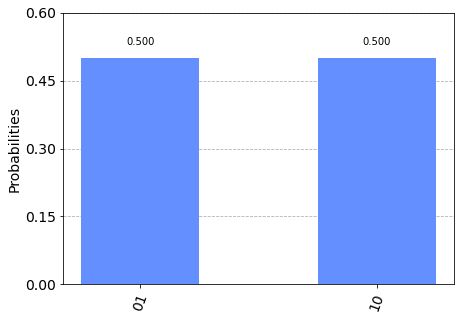

In [8]:
results = execute(qc_bell,backend).result().get_counts()
plot_histogram(results)

### 2. 
設問1にて作成した回路は状態$\ket{00}$を$\frac{1}{\sqrt{2}}(\ket{01}+\ket{10})$に変換するものである。  
この回路のユニタリー行列をQiskitシミュレータを使用して計算せよ。このユニタリー行列が正しい変換を行えることを検証せよ。
***

上の問題1.で作成した回路を、unitary simulatorを用いてユニタリ行列で表示する。

In [9]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc_bell,backend).result().get_unitary()

from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="U =")

<IPython.core.display.Latex object>

実際,

$
U\ket{00}=\begin{bmatrix} 0&0&\frac{1}{\sqrt{2}}&\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}&-\frac{1}{\sqrt{2}}&0&0 
\\ \frac{1}{\sqrt{2}}&\frac{1}{\sqrt{2}}&0&0 \\ 0&0&\frac{1}{\sqrt{2}}&-\frac{1}{\sqrt{2}}
\end{bmatrix} \begin{bmatrix} 1\\0\\0\\0\end{bmatrix}
=
\begin{bmatrix} 0\\\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}\\0\end{bmatrix}
=
\frac{1}{\sqrt{2}}\begin{bmatrix} 0\\1\\0\\0\end{bmatrix} + \frac{1}{\sqrt{2}}\begin{bmatrix} 0\\0\\1\\0\end{bmatrix}
=
\frac{1}{\sqrt{2}}(\ket{01}+\ket{10})
$

となり、 正しい変換になっていることが分かる。

### 3.

状態ベクトルを視覚的に表現する他の方法について考えてみよ。各振幅の大きさと位相を読み取ることができる、興味深い視覚化をデザインできるか？
***

例えば IBM Quantum Composer のドキュメント (https://quantum-computing.ibm.com/composer/docs/iqx/visualizations) には、Q-sphereを含むいくつかの可視化の方法が提案されている。

読者も考えられたい。